# Regression

## Linear Regression

In [1]:
# Import deps
import numpy as np
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Input training data
X_train = np.array([
    5.86, 1.34, 3.65, 4.69, 4.13,
    5.87, 7.91, 5.57, 7.30, 7.89
    ]).reshape(-1, 1)
y_train = np.array([
    0.74, 1.18, 0.51, -0.48, -0.07,
    0.37, 1.35, 0.30, 1.64, 1.75
    ])

X_test = np.array([
    5.80, 0.57, 4.3, 6.55, 0.82,
    3.72, 5.8, 3.26, 6.75, 4.77
    ]).reshape(-1, 1)
y_test = np.array([
    0.93, 1.87, -0.06, 1.6, 1.22,
    0.9, 0.93, 1.53, 1.73, -0.51
    ])

In [3]:
# Linear Regression Model
regr = lr()
regr.fit(X_train, y_train)

LinearRegression()

In [4]:
# Predict
y_pred = regr.predict(X_test)
y_train_pred = regr.predict(X_train)

In [5]:
from mlxtend.evaluate import bias_variance_decomp

def print_info(model, y_test, y_pred):
    print(f'x_mean: {np.mean(X_train)} y_mean: {np.mean(y_train)}')
    # The coefficients
    print(f'Coefficients: {model.coef_} Intercept: {model.intercept_}')
    # The mean squared error
    print('Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
        % r2_score(y_test, y_pred))
    mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=2000)
    print(f'Accuracy (bias): {bias} Precision (variance): {var} MSE: {mse}')

    print(y_pred)

print_info(regr, y_test, y_pred)

x_mean: 5.420999999999999 y_mean: 0.729
Coefficients: [0.15748272] Intercept: -0.12471381723758779
Mean squared error: 0.94
Coefficient of determination: -0.74
Accuracy (bias): 1.1680105576764876 Precision (variance): 0.2852742955202107 MSE: 1.4532848531966993
[ 0.78868595 -0.03494867  0.55246187  0.90679799  0.00442201  0.4611219
  0.78868595  0.38867985  0.93829453  0.62647875]


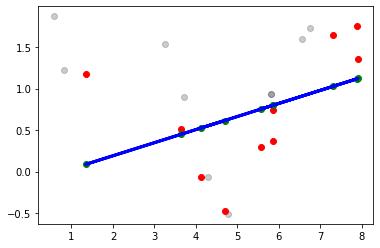

In [6]:
# Plot
plt.scatter(X_test, y_test, color='black', alpha=0.2)
plt.scatter(X_train, y_train, color='red')
plt.scatter(X_train, y_train_pred, color='green')
plt.plot(X_train, y_train_pred, color='blue', linewidth=3)

plt.xticks()
plt.yticks()

plt.show()
plt.close()

## Polynomial Regression

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [8]:
degree = 4
polyregr = Pipeline([
    ('poly', PolynomialFeatures(degree)),
    ['regr', lr()]
    ])
polyregr.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=4)),
                ['regr', LinearRegression()]])

In [9]:
poly_train_pred = polyregr.predict(X_train)
poly_test_pred = polyregr.predict(X_test)
print(poly_train_pred)
poly_regr = polyregr['regr']
print(f'Coefficients: {poly_regr.coef_} Intercept: {poly_regr.intercept_}')

[ 0.46706374  1.18710559  0.37378184 -0.21075891 -0.02564161  0.47769879
  1.49117831  0.18497421  1.82450312  1.52009492]
Coefficients: [ 0.         10.91680274 -4.60513795  0.73170903 -0.03884038] Intercept: -6.807764064385664


In [10]:
# Sort the data to plot quad line
xp, yp = zip(*sorted(zip(X_train, poly_train_pred)))

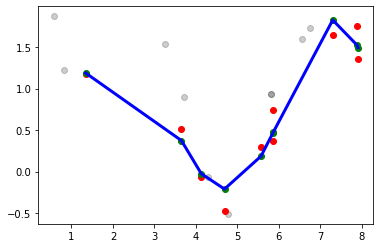

In [11]:
plt.scatter(X_test, y_test, color='black', alpha=0.2)
plt.scatter(X_train, y_train,  color='red')
plt.scatter(xp, yp,  color='green')
plt.plot(xp, yp, color='blue', linewidth=3)
plt.xticks()
plt.yticks()

plt.show()

## Bias-Variance Tradeoff

## Regression General Solution

$$\Theta = (X^TX)^{-1}X^TY$$

In [12]:
def analytic_solution(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

def make_polynomial_data_mat(X, degree=1):
    X = np.insert(X, 0, np.ones(X.shape[0]), axis=1)
    for i in range(1, degree):
        X = np.insert(X, i + 1, np.power(np.ndarray.flatten(X_train), i + 1), axis=1)
    return X

In [13]:
degrees = [1, 2, 4]

for deg in degrees:
    solution = analytic_solution(make_polynomial_data_mat(X_train, deg), y_train)
    print(f'degree {deg} params: {solution}')

degree 1 params: [-0.12471382  0.15748272]
degree 2 params: [ 2.38902063 -1.07370721  0.1252789 ]
degree 4 params: [-6.80776406 10.91680274 -4.60513795  0.73170903 -0.03884038]


## Ridge

In [14]:
from sklearn.linear_model import Ridge